# Factor analysis (FA) vs. independent component analysis (ICA)
- Similar in some sense: want to extract underlying information from some variables
- FA uncovers underlying shared trend
- ICA unscrabmles mixture of independent signals

## Factor analysis:
- statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors
- for example, it is possible that variations in six observed variables mainly reflect the variations in two unobserved underlying variables (factors)
- the observed variables are modelled as linear combinations of the potential factors plus error terms

## Independent component analysis:
- computational method for separating a multivariate signal into additive subcomponents
- assume that at most one subcomponent is Gaussian, and that all subcomponents are statistically independent
- ICA is a case of blind source separation, e.g., the cocktail party problem

# Independent Component Analysis (ICA)

## 1. What ICA Tries To Do (Problem Statement)

Independent Component Analysis (ICA) solves the following problem.

You observe signals

$$
\mathbf{x}(t) =
\begin{bmatrix}
x_1(t) \\
x_2(t) \\
\vdots \\
x_n(t)
\end{bmatrix}
$$

These are **mixtures** of some unknown, statistically **independent** source signals

$$
\mathbf{s}(t) =
\begin{bmatrix}
s_1(t) \\
s_2(t) \\
\vdots \\
s_n(t)
\end{bmatrix}
$$

The mixing is assumed to be **linear** and **instantaneous**:

$$
\mathbf{x}(t) = A \, \mathbf{s}(t)
$$

where $$A$$ is an **unknown** mixing matrix.

The goal of ICA is:

> **Given only the measurements $$\mathbf{x}(t)$$recover the independent sources $$\mathbf{s}(t)$$**

This is the classical **Blind Source Separation (BSS)** problem.


## 2. The Cocktail Party Problem

A classic example of ICA is the **cocktail party problem**.

Imagine three people speaking at the same time:

- **Person A**
- **Person B**
- **Person C**

and three microphones placed around the room:

- **Microphone 1**
- **Microphone 2**
- **Microphone 3**

Each microphone records a **mixture** of all voices. For example,

- Microphone 1 is closest to Person A, so A’s voice is strongest.  
- Microphone 2 hears mostly Person B.  
- Microphone 3 hears a different combination of all three.

Mathematically, each microphone signal is a weighted sum of the three voices:

$$
\mathbf{x}(t) = A \, \mathbf{s}(t)
$$

where  
- $$\mathbf{s}(t) = [s_A(t),\, s_B(t),\, s_C(t)]^\top$$ are the independent voice signals  
- $$\mathbf{x}(t) = [x_1(t),\, x_2(t),\, x_3(t)]^\top$$ are the microphone recordings  
- $$A$$ describes how strongly each voice contributes to each microphone

**ICA's goal** is to “unmix” the recordings and recover the individual voices  
$$\hat{\mathbf{s}}(t) = W \, \mathbf{x}(t)$$  
using only the microphone signals.


## 3. Assumptions and Main Idea

To use ICA we make a few key assumptions.

1. **Linear instantaneous mixing**  
   Microphone signals are linear mixtures of the sources  
   $$
   \mathbf{x}(t) = A \, \mathbf{s}(t)
   $$

2. **At least as many microphones as sources**  

3. **Sources are statistically independent and non Gaussian**  

4. **Basic ICA ignores noise**

### How ICA works in practice

1. Observe mixtures $$\mathbf{x}(t)$$ from microphones.  
2. Center and whiten the data.  
3. Use an ICA algorithm (FastICA) to estimate the demixing matrix $$W$$.  
4. Recover estimated sources  
   $$
   \hat{\mathbf{s}}(t) = W \, \mathbf{x}(t)
   $$

Next is a Python demo that simulates three people speaking, mixes them through three microphones, and uses ICA to separate them again.


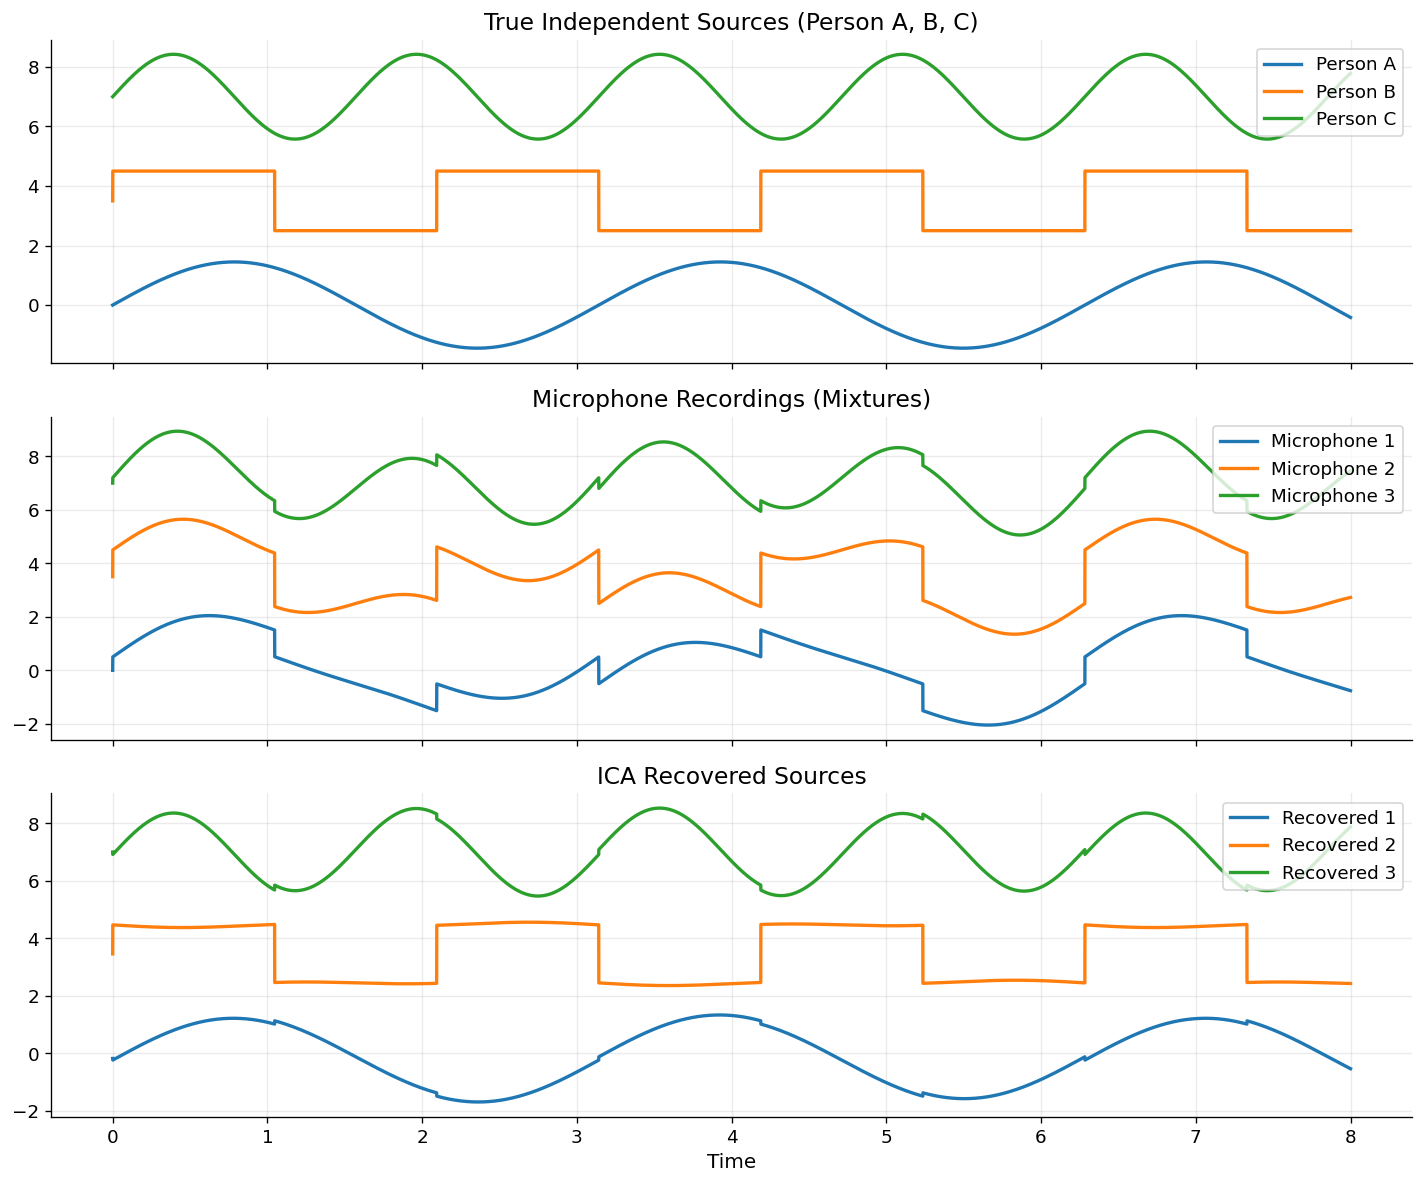

True mixing matrix A:
 [[1.  0.5 0.2]
 [0.4 1.  0.5]
 [0.3 0.2 1. ]]

ICA Estimated Mixing Matrix:
 [[1.  0.6 0.2]
 [0.4 1.1 0.5]
 [0.3 0.3 1. ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Pretty style

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # consistent colors

rng = np.random.default_rng(0)

# --------------------------------------------------
# 1. Create three independent "people speaking"
# --------------------------------------------------
n_samples = 10000
t = np.linspace(0, 8, n_samples)

person_A = np.sin(2 * t)                        # smooth speaker
person_B = np.sign(np.sin(3 * t))              # sharp square wave voice
person_C = np.sin(4 * t)                      # sawtooth-like speech

S = np.c_[person_A, person_B, person_C]        # shape (N, 3)
S /= S.std(axis=0)                              # normalize

# --------------------------------------------------
# 2. Three microphones mixing the voices
# --------------------------------------------------
A = np.array([
    [1.0, 0.5, 0.2],   # Microphone 1
    [0.4, 1.0, 0.5],   # Microphone 2
    [0.3, 0.2, 1.0],   # Microphone 3
])

X = S @ A.T                                     # microphone signals

# --------------------------------------------------
# 3. ICA recovers the voices
# --------------------------------------------------
ica = FastICA(n_components=3, random_state=0)
S_hat = ica.fit_transform(X)

# --------------------------------------------------
# 4. Plot everything cleanly
# --------------------------------------------------
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# >>> Original voices (People A/B/C)
axes[0].set_title("True Independent Sources (Person A, B, C)", fontsize=14)
for i in range(3):
    axes[0].plot(
        t, S[:, i] + 3.5 * i,
        color=colors[i],
        label=f"Person {chr(65+i)}"
    )
axes[0].legend(loc="upper right")
axes[0].grid(True)

# >>> Microphone recordings
axes[1].set_title("Microphone Recordings (Mixtures)", fontsize=14)
for i in range(3):
    axes[1].plot(
        t, X[:, i] + 3.5 * i,
        color=colors[i],
        label=f"Microphone {i+1}"
    )
axes[1].legend(loc="upper right")
axes[1].grid(True)

# >>> ICA recovered voices
axes[2].set_title("ICA Recovered Sources", fontsize=14)
for i in range(3):
    axes[2].plot(
        t, S_hat[:, i] + 3.5 * i,
        color=colors[i],
        label=f"Recovered {i+1}"
    )
axes[2].legend(loc="upper right")
axes[2].grid(True)

axes[2].set_xlabel("Time", fontsize=12)

plt.tight_layout()
plt.show()

print("True mixing matrix A:\n", A)
print("\nICA Estimated Mixing Matrix:\n", np.round(ica.mixing_,1))


## 4. What is Factor Analysis (FA)?

Factor Analysis (FA) is a statistical method used to explain **correlations** among observed variables using a smaller number of **latent factors**.

You observe signals

$$
\mathbf{x}(t) =
\begin{bmatrix}
x_1(t) \\
x_2(t) \\
\vdots \\
x_n(t)
\end{bmatrix}
$$

FA assumes each signal is generated as

$$
\mathbf{x}(t) = \Lambda \, \mathbf{f}(t) + \boldsymbol{\epsilon}(t)
$$

where

- $$\mathbf{f}(t)$$ are **latent factors** (typically Gaussian)
- $$\Lambda$$ is a loading matrix
- $$\boldsymbol{\epsilon}(t)$$ is noise

### FA is not a separation method  
FA does *not* try to unmix independent sources.

Instead, FA tries to find a small number of latent variables that explain **shared variation** (correlations) among the measured signals.

### Intuition  
If ICA models a “cocktail party”, FA models a “common trend”:

- All measurements rise together because of Factor 1  
- Some measurements fall together because of Factor 2  
- Noise is modeled explicitly

FA finds **smooth, shared structure**, not independent components.

### Key assumptions
1. Factors are **Gaussian**
2. Factors explain **correlations**, not independence
3. Noise is explicitly modeled
4. The goal is to describe variability among observed, correlated variables, and not source separation


### 5. Factor analysis demo – one hidden factor behind three signals

In the ICA cocktail party example

- There were **three independent people** speaking  
- There were **three microphones**  
- ICA tried to **separate** the independent voices

For factor analysis we change the story.

Now we imagine **one hidden factor** that affects several measured variables at the same time.  
Examples

- A global **economic condition** that moves many financial indicators together  
- A general **difficulty level** that affects many exam scores  
- A common **trend** in several sensors

In this demo

- There is a **single latent factor**  
  $$
  f(t)
  $$
  which is a smooth sinusoid plus some random variation  
- There are **three observed variables**  
  $$
  x_1(t), x_2(t), x_3(t)
  $$
  Each one is  
  $$
  x_i(t) = \lambda_i f(t) + \text{noise}_i(t)
  $$
  where the loading $$\lambda_i$$ says how strongly variable \(i\) follows the hidden factor

So instead of three independent people and three microphones we have

- One hidden factor playing the role of a **shared cause**  
- Three observed signals that are **correlated** because they all depend on this factor

Factor analysis receives only the three observed signals and tries to **reconstruct the hidden factor** that explains their common movement.  
This is different from ICA

- ICA tries to **separate independent sources**  
- Factor analysis tries to **find a small number of common factors** that explain correlations


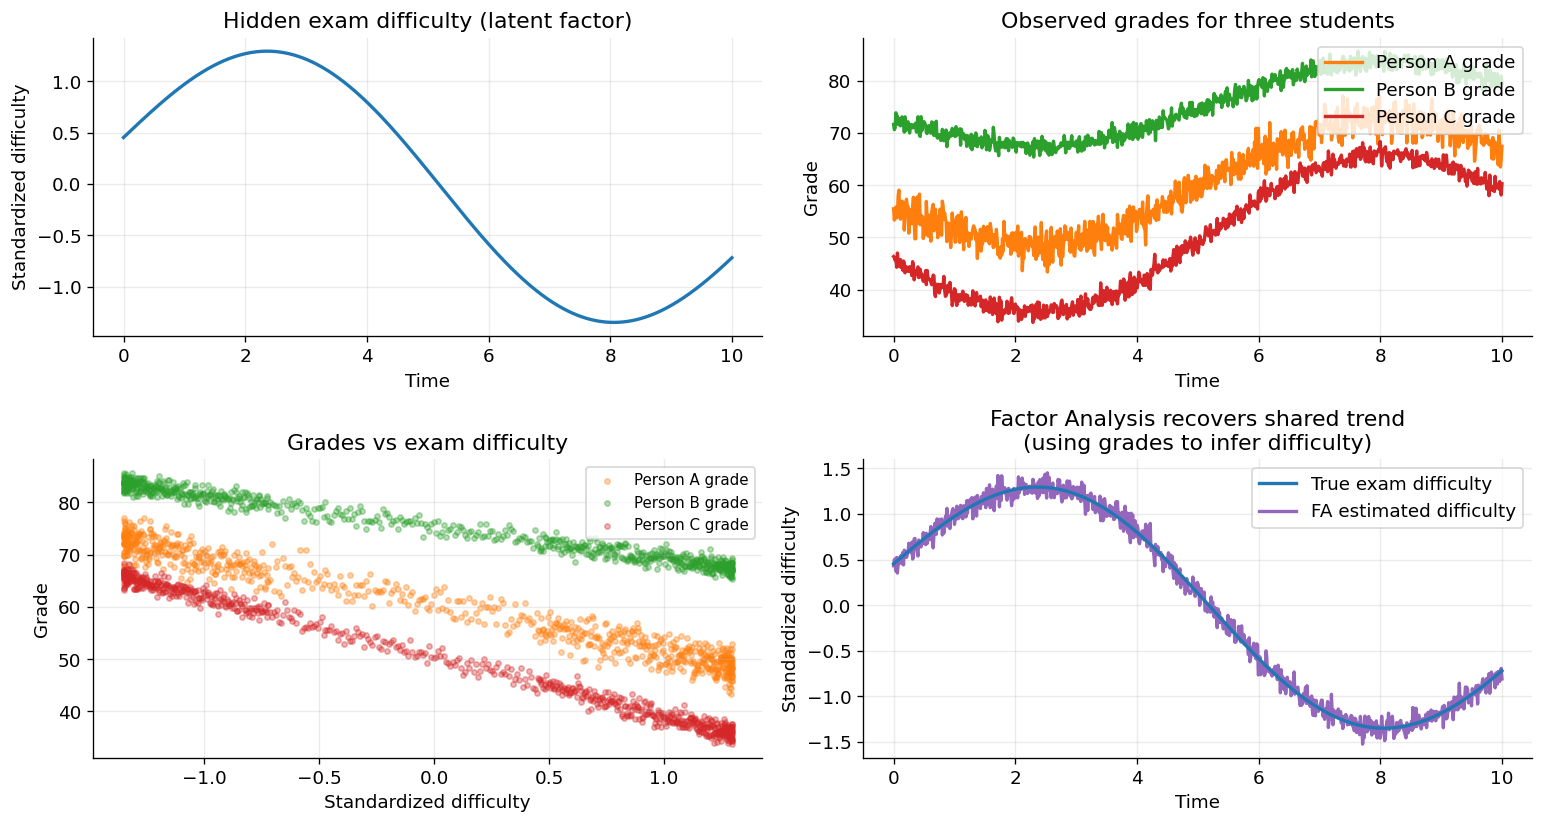

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

# ---------- Style ----------
plt.rcParams.update({
    "figure.dpi": 120,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "lines.linewidth": 2.0,
    "font.size": 11,
})

# ---------- 1. Hidden exam difficulty (latent factor) ----------
n_samples = 800
t = np.linspace(0, 10, n_samples)

# Think of this as how hard the exam is over time (harder when the curve is high)
exam_difficulty = (
    0.8 * np.sin(0.6 * t)
    + 0.4 * np.cos(0.2 * t + 0.7)
)

# ---------- 2. Observed grades for three students ----------
# Baseline average grades
means = np.array([60.0, 75.0, 50.0])                 # Person A, B, C

# How sensitive each person is to exam difficulty
# Negative loading: harder exam → lower grade
loadings = np.array([-12.0, -8.0, -15.0])

# Individual noise (random performance, guessing, etc.)
noise_std = np.array([2.0, 1.0, 1.0])

# Observed grades X: shape (n_samples, 3)
X = means + exam_difficulty.reshape(-1, 1) * loadings.reshape(1, -1) \
    + noise_std.reshape(1, -1) * np.random.randn(n_samples, 3)

# ---------- 3. Apply Factor Analysis (1 factor) ----------
fa = FactorAnalysis(n_components=1, random_state=0)
difficulty_est = fa.fit_transform(X).squeeze()

# Normalize for plotting
true_norm = (exam_difficulty - exam_difficulty.mean()) / exam_difficulty.std()
est_norm = (difficulty_est - difficulty_est.mean()) / difficulty_est.std()

# Fix sign so they align visually
if np.corrcoef(true_norm, est_norm)[0, 1] < 0:
    est_norm *= -1

# ---------- 4. Subplots ----------
fig, axes = plt.subplots(2, 2, figsize=(13, 7))

# (1) Hidden exam difficulty
ax = axes[0, 0]
ax.plot(t, true_norm, color="#1f77b4")
ax.set_title("Hidden exam difficulty (latent factor)")
ax.set_xlabel("Time")
ax.set_ylabel("Standardized difficulty")

# (2) Grades over time
ax = axes[0, 1]
colors = ["#ff7f0e", "#2ca02c", "#d62728"]
labels = ["Person A grade", "Person B grade", "Person C grade"]

for i in range(3):
    ax.plot(t, X[:, i], color=colors[i], label=labels[i])
ax.set_title("Observed grades for three students")
ax.set_xlabel("Time")
ax.set_ylabel("Grade")
ax.legend(loc="upper right")

# (3) Grades vs difficulty (scatter)
ax = axes[1, 0]
for i in range(3):
    ax.scatter(true_norm, X[:, i],
               color=colors[i], alpha=0.35, s=10, label=labels[i])
ax.set_title("Grades vs exam difficulty")
ax.set_xlabel("Standardized difficulty")
ax.set_ylabel("Grade")
ax.legend(loc="upper right", fontsize=9)

# (4) FA recovers exam difficulty from grades
ax = axes[1, 1]
ax.plot(t, true_norm, label="True exam difficulty", color="#1f77b4", zorder=5)
ax.plot(t, est_norm, label="FA estimated difficulty", color="#9467bd")
ax.set_title("Factor Analysis recovers shared trend\n(using grades to infer difficulty)")
ax.set_xlabel("Time")
ax.set_ylabel("Standardized difficulty")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


## 6. ICA vs Factor Analysis (FA)

| Property | ICA | Factor Analysis |
|---------|-----|-----------------|
| Goal | Recover independent sources | Recover shared latent factors |
| Assumes | Non-Gaussian, independent sources | Gaussian factors + noise |
| Noise model | Not explicit | Explicit: $$\epsilon(t)$$ |
| Identifiability | Up to scale + permutation | Rotation ambiguity |
| Main use | Blind source separation | Find shared trend |
| Example | Cocktail party voices | Common trend in finance/economics |
| Recovers | Signals | Structure |
| Input requirement | Samples > sources | Any number of variables |

### Summary  

- **ICA separates independent signals**
- **FA explains correlations with a small number of latent factors**

They solve *completely different* problems, even though both perform matrix decompositions.
